<a href="https://colab.research.google.com/github/aezamor3/MAT421/blob/main/MAT_421_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*****My Notes on Lagrange Polynomial Interpolation***

This method of interpolation finds a single polynomial (called the Lagrange Polynomial, $L(x)$) that passes through all data points. Each Lagrange Polynomial should have the property; $L(x_i)=u_i$ for each point in the data set. It is extrememly useful to write them as a linear comnination of Lagrange Basis Poynomials, $P_i(x)$, where 

$𝑃𝑖(𝑥)=∏^𝑛_𝑗(𝑥−𝑥_𝑗)/(𝑥_𝑖−𝑥_𝑗)$

and $𝐿(𝑥)=∑^𝑛_𝑖𝑦_𝑖𝑃_𝑖(𝑥).$


Write a function my_lagrange(x, y, X), where the output Y is the Lagrange interpolation of the data points contained in x and y computed at X. Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don’t use the existing lagrange function from scipy.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def my_lagrange(x,y,X):
  Y=0
  for i in range(len(x)):
    p=1
    for j in range(len(x)):
      if i!=j:
        px=X-x[j]
        dx=x[i]-x[j]
        p=p*px/dx
    Y=y[i]*p+Y
  return Y


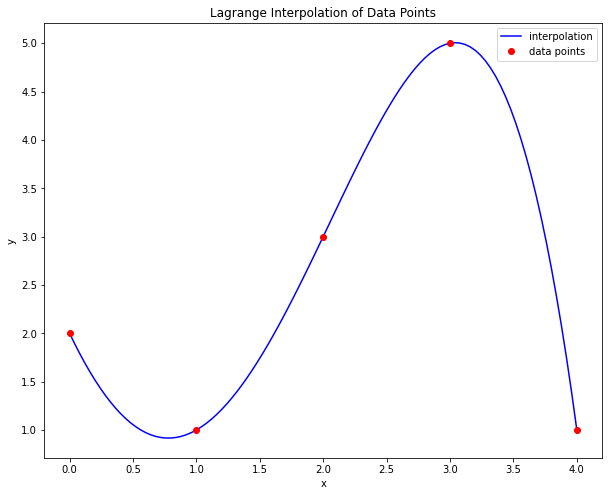

In [47]:
x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

X = np.linspace(0, 4, 101)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), 'b', label = 'interpolation')
plt.plot(x, y, 'ro', label = 'data points')

plt.xlabel('x')
plt.ylabel('y')

plt.title(f'Lagrange Interpolation of Data Points')
plt.legend()
plt.show()

*****My Notes on Newton's Polynomial Interpolation***

This method is usex to get an exact fit for a set of data points. An n-1 order Newton's polynomial that goes through n points takes the form:

$𝑓(𝑥)=𝑎_0+𝑎_1(𝑥−𝑥_0)+𝑎_2(𝑥−𝑥_0)(𝑥−𝑥_1)+⋯+𝑎_𝑛(𝑥−𝑥_0)(𝑥−𝑥_1)…(𝑥−𝑥_𝑛)$

also expressed as:

$𝑓(𝑥)=∑^n_i=0 $  $𝑎_𝑖𝑛_𝑖(𝑥)$

$a_i$ can be determined with a simple formula for the first degree:
$𝑎_1=(𝑦_1−𝑦_0) / (𝑥_1−𝑥_0)$

and in the second degree expanding to:

$𝑎_2=(((𝑦_2−𝑦_1)/(𝑥_2−𝑥_1))−((𝑦_1−𝑦_0)/(𝑥_1−𝑥_0)))/(𝑥_2−𝑥_0$)

,and so on.
This method is referred to as deived differences.

Fit the data x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1] using Newton’s polynomial interpolation.

In [51]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [52]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

In [53]:
def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

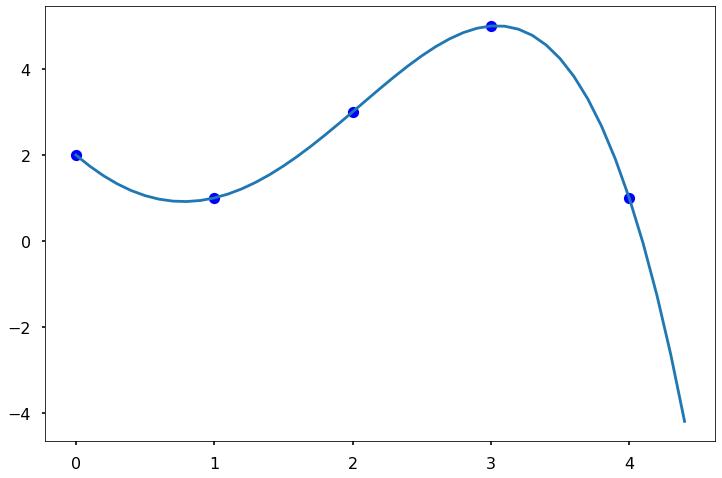

In [61]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 1, 3, 5, 1])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(0, 4.5, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)